In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
# city_data.head()

In [23]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

# Combine the data into a single dataset
city_ride_data = pd.merge(ride_data,city_data,on='city')
# city_ride_data.head()
# Display the data table for preview

## Bubble Plot of Ride Sharing Data

In [24]:
# Obtain the x and y coordinates for each of the three city types
city_types = city_ride_data.type.unique()
# city_types
# array(['Urban', 'Suburban', 'Rural'], dtype=object)

colors = ["gold","skyblue","lightcoral"]


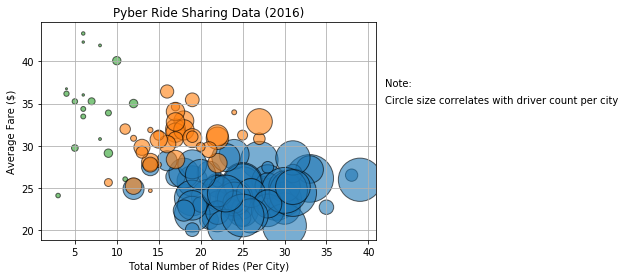

In [26]:
# Build the scatter plots for each city types
# table work
city_types = city_ride_data.type.unique()
aggregation = { 
     'fare': 'mean' ,
     'ride_id': 'nunique',
     'driver_count': 'sum'
}
rides={type:pd.DataFrame(city_ride_data[city_ride_data.type == type].groupby(['city','type']).agg(aggregation)['ride_id']) for type in city_types} # works
fares={type:pd.DataFrame(city_ride_data[city_ride_data.type == type].groupby(['city','type']).agg(aggregation)['fare']) for type in city_types} # works
drivers={type:pd.DataFrame(city_ride_data[city_ride_data.type == type].groupby(['city','type']).agg(aggregation)['driver_count']) for type in city_types} # works


# output
{type: plt.scatter(rides[type],fares[type], s=drivers[type], alpha=0.6, edgecolors='black') for type in city_types} #works

plt.xlabel('Total Number of Rides (Per City)', fontdict=None, labelpad=None)
plt.ylabel('Average Fare ($)', fontdict=None, labelpad=None)
plt.title('Pyber Ride Sharing Data (2016)', fontdict=None, loc='center', pad=None)
plt.grid(b=None, which='major', axis='both')

# Incorporate a text label regarding circle size
plt.text(42,37,"Note:")
plt.text(42,35,"Circle size correlates with driver count per city") #compliments of Tommy
# Save Figure
plt.savefig('pyber ride sharing data alternate approach.png')

In [6]:
# Show plot
plt.show()

## Total Fares by City Type

## Total Rides by City Type

## Total Drivers by City Type